In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, spearmanr

import warnings
warnings.filterwarnings("ignore")

### Latar Belakang
Airbnb merupakan perusahaan asal Amerika yang bergerak di bidang online marketplace dengan untuk keperluan hunian sementara atau jangka panjang. Dua stakeholder utama airbnb adalah mitra kerjanya (airbnb host) dan airbnb customer. Kedua stakeholder ini memegang peranan penting dalam bisnis airbnb sehingga korelasi antara keduanya sangat penting untuk dipelajari melalui data area dan tinjauan terhadap hasil penggunaan dari host.

### Pernyataan Masalah
Airbnb di Area Bangkok, Thailand memiliki beberapa distrik dengan tingkat keramaian yang berbeda, sehingga perusahaan ingin mengetahui perkembangan (growth) untuk transaksi di seluruh Bangkok. Informasi ini penting untuk host dalam melakukan pengembangan hunian di setiap masing-masing areanya.

Sebagai Data Analyst, saya akan menjawab pertanyaan berikut :
**Bagaimana karakteristik customer dalam menentukan hunian Airbnb di seluruh Bangkok?**

### DATA UNDERSTANDING

In [2]:
df=pd.read_csv('Airbnb_Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


Dataset ini memiliki susunan data terkait aktivitas hunian dengan total review yang tercatat dengan rincian sebagai berikut :
- id : nomor id untuk hunian / listing
- name : nama hunian / listing
- host_id : nomor id untuk host
- host_name : nama host
- neighborhood : lokasi / area listing berada
- latitude : titik spesifik garis lintang
- longitude : titik spesifik garis bujur
- room_type : jenis kamar sesuai ketentuan Airbnb
- price : harga hunian per malam
- minimum_nights : pemesanan banyaknya malam minimal untuk satu hunian
- number_of_reviews : jumlah review hunian dari customer
- last_review : tanggal terakhir di review oleh customer
- calculated_host_listing_count : berapa banyak listing yang host miliki dalam suatu area
- avalability_365 : hari tersedia listing dalam 1 tahun kedepan
- number_of_reviews_ltm : jumlah review oleh customer dalam 12 bulan terakhir

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064

In [5]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [6]:
    pd.set_option('display.max_colwidth', 120)
    # data uni di tiap kolom
    listItem = []
    for col in df.columns :
        listItem.append( [col, df[col].nunique(), df[col].unique()])
    
    tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                         data=listItem)
    tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254,..."
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one be..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 2129668, 222005, 7045870, 9181769, 5171292, 263049, 9279712, 284095, 515347..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, Mimi, Natcha, Srisuk..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen, Rat Burana, Chatu Chak, Khlong San, Bang Rak, Phaya Thai..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872, 13.69757, 13.68556, 13.82925, 13.81693, 13.7204, 13.71934, 13.774..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338, 100.5288, 100.49535, 100.56737, 100.56433, 100.50757, 100.51..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700, 1150, 1893, 1862, 910, 1400, 4156, 1577, 122594, 5680, 5034, 1500, 13..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 180, 90, 5, 358, 1125, 29, 14, 200, 365, 120, 9, 12, 300, 360, 100, 10,..."


### MISSING VALUE

Perhitungan persentase missing data untuk bisa dilakukan data cleansing ditemukan ada beberapa data yang kosong seperti di name, host_name, last_review, dan reviews_per_month

In [7]:
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

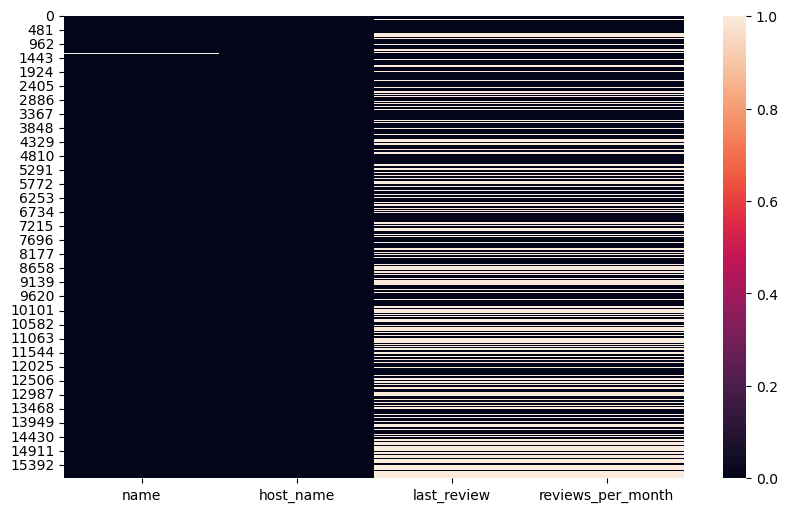

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [10]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [11]:
## mengubah tipe data last_review dari object ke datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

In [12]:
## melakukan penghapusan data object yang kosong (NA)
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['host_name'], inplace=True)

In [13]:
## melakukan penghapusan data dengan price = 0
df.drop(df[df['price'] == 0].index, inplace=True)

In [14]:
## mengisi data kosong pada kolom reviews_per_month menjadi 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15844 non-null  int64         
 1   name                            15844 non-null  object        
 2   host_id                         15844 non-null  int64         
 3   host_name                       15844 non-null  object        
 4   neighbourhood                   15844 non-null  object        
 5   latitude                        15844 non-null  float64       
 6   longitude                       15844 non-null  float64       
 7   room_type                       15844 non-null  object        
 8   price                           15844 non-null  int64         
 9   minimum_nights                  15844 non-null  int64         
 10  number_of_reviews               15844 non-null  int64         
 11  last_re

<Axes: >

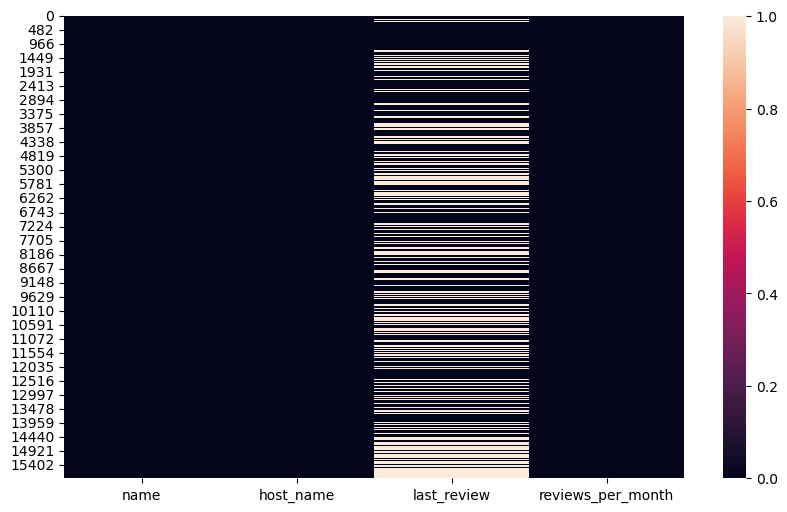

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

In [17]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0


### Neighborhood Analysis

In [18]:
df['neighbourhood'].nunique()

50

In [19]:
df.groupby('neighbourhood').count()['id']

neighbourhood
Bang Bon                   5
Bang Kapi                259
Bang Khae                 92
Bang Khen                116
Bang Kho laen            140
Bang Khun thain           21
Bang Na                  457
Bang Phlat               216
Bang Rak                 827
Bang Sue                 250
Bangkok Noi              152
Bangkok Yai               90
Bueng Kum                 54
Chatu Chak               548
Chom Thong                74
Din Daeng                443
Don Mueang               167
Dusit                     91
Huai Khwang             1125
Khan Na Yao               55
Khlong Sam Wa             32
Khlong San               357
Khlong Toei             2096
Lak Si                   126
Lat Krabang              149
Lat Phrao                 57
Min Buri                  62
Nong Chok                 14
Nong Khaem                 9
Parthum Wan              455
Phasi Charoen            155
Phaya Thai               422
Phra Khanong             557
Phra Nakhon              619


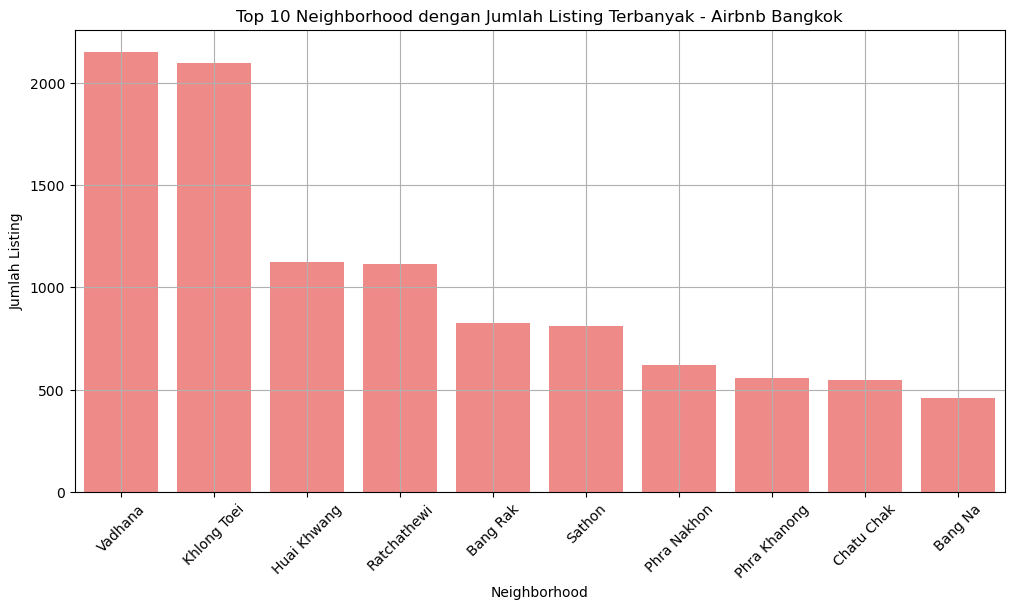

In [20]:
# Hitung jumlah listing per neighborhood
listing_per_neighbourhood = df['neighbourhood'].value_counts().reset_index()
listing_per_neighbourhood.columns = ['neighbourhood', 'jumlah_listing']

# Ambil Top 10
top10_neighbourhood = listing_per_neighbourhood.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='neighbourhood', y='jumlah_listing', data=top10_neighbourhood, color='#FF7977')

plt.title('Top 10 Neighborhood dengan Jumlah Listing Terbanyak - Airbnb Bangkok')
plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Listing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Price Analysis

In [21]:
crosstab_median_price = pd.pivot_table(
    df,
    values='price',                 # nilai yang dihitung
    index='neighbourhood',         # baris berdasarkan neighborhood
    columns='room_type',           # kolom berdasarkan tipe kamar
    aggfunc='median'               # fungsi agregasi: median
)
crosstab_median_price['Total Median'] = df.groupby('neighbourhood')['price'].median()
median_top = crosstab_median_price.sort_values(by='Total Median', ascending=False).head(10)
median_top

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total Median
neighbourhood,,,,,
Nong Chok,3831.5,NaN,822.5,NaN,2539.0
Parthum Wan,2590.0,3000.0,2000.0,500.0,2400.0
Vadhana,2100.0,2440.5,1796.5,565.0,2000.0
Samphanthawong,2300.0,2900.0,1586.0,620.0,2000.0
Bang Rak,2228.0,1690.0,1757.0,400.0,1850.0
Pom Prap Sattru Phai,2078.0,745.0,1851.0,514.0,1709.0
Khlong Toei,1732.0,1816.0,1498.5,560.0,1700.0
Ratchathewi,1649.5,1504.5,1434.5,470.0,1536.0
Taling Chan,2500.0,NaN,1381.0,775.0,1502.5


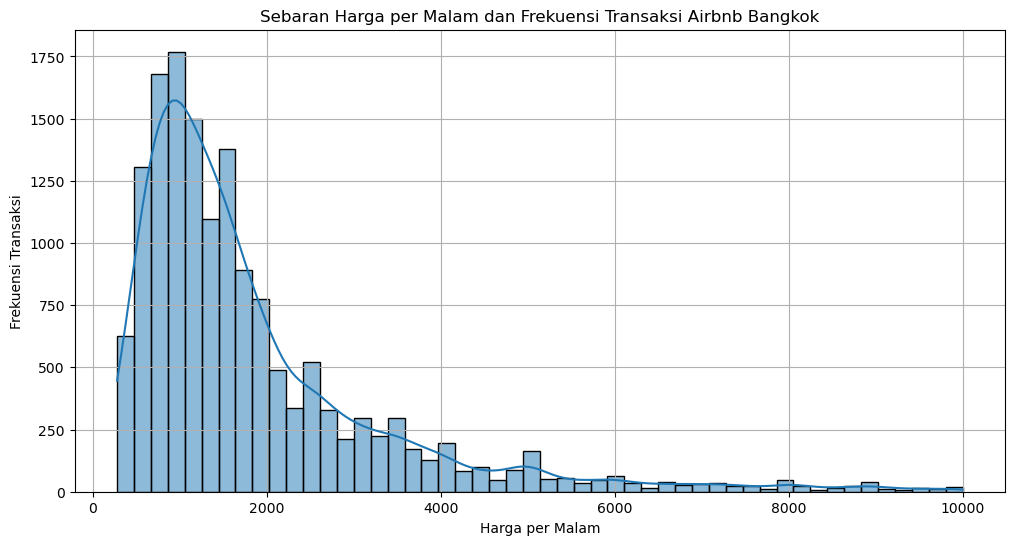

In [22]:
df_filtered = df[df['price'] < 10000]  # misal hanya ambil harga < 10.000

# Plot sebaran harga vs frekuensi
plt.figure(figsize=(12,6))
sns.histplot(df_filtered['price'], bins=50, kde=True, edgecolor='black')

plt.title('Sebaran Harga per Malam dan Frekuensi Transaksi Airbnb Bangkok')
plt.xlabel('Harga per Malam')
plt.ylabel('Frekuensi Transaksi')
plt.grid(True)
plt.show()

In [23]:
# Analisa Lokasi vs Harga
df[['latitude', 'longitude', 'price']].head()

,latitude,longitude,price
0,13.75983,100.54134,1905
1,13.66818,100.61674,1316
2,13.75232,100.62402,800
3,13.78823,100.57256,1286
4,13.76872,100.63338,1905


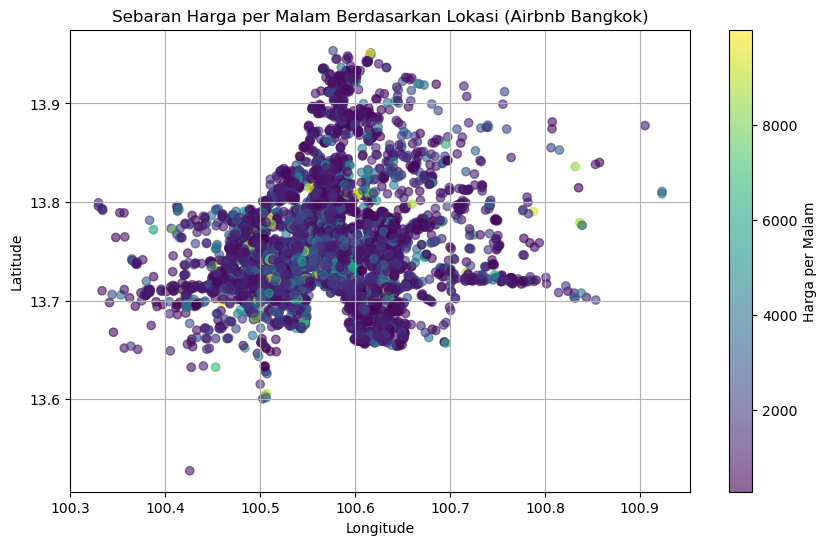

In [24]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_filtered['longitude'], df_filtered['latitude'], 
                      c=df_filtered['price'], cmap='viridis', alpha=0.6)

plt.colorbar(scatter, label='Harga per Malam')
plt.title('Sebaran Harga per Malam Berdasarkan Lokasi (Airbnb Bangkok)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [25]:
# Filter harga ekstrem → disimpan ke df_filter
df_filter = df[df['price'] < 10000]

# Pivot table: median price per neighbourhood
median_price_per_neighbourhood = pd.pivot_table(
    df_filter, 
    index='neighbourhood', 
    values='price', 
    aggfunc='median'
)

# Sort dari median price tertinggi dan ambil top 10
top10_neighbourhoods = median_price_per_neighbourhood.sort_values(by='price', ascending=False).head(10).index

# Filter data hanya untuk top 10 neighbourhood
df_filter_top10 = df_filter[df_filter['neighbourhood'].isin(top10_neighbourhoods)]
top10_neighbourhoods

Index(['Nong Chok', 'Parthum Wan', 'Samphanthawong', 'Vadhana', 'Bang Rak',
       'Pom Prap Sattru Phai', 'Khlong Toei', 'Ratchathewi', 'Thawi Watthana',
       'Taling Chan'],
      dtype='object', name='neighbourhood')

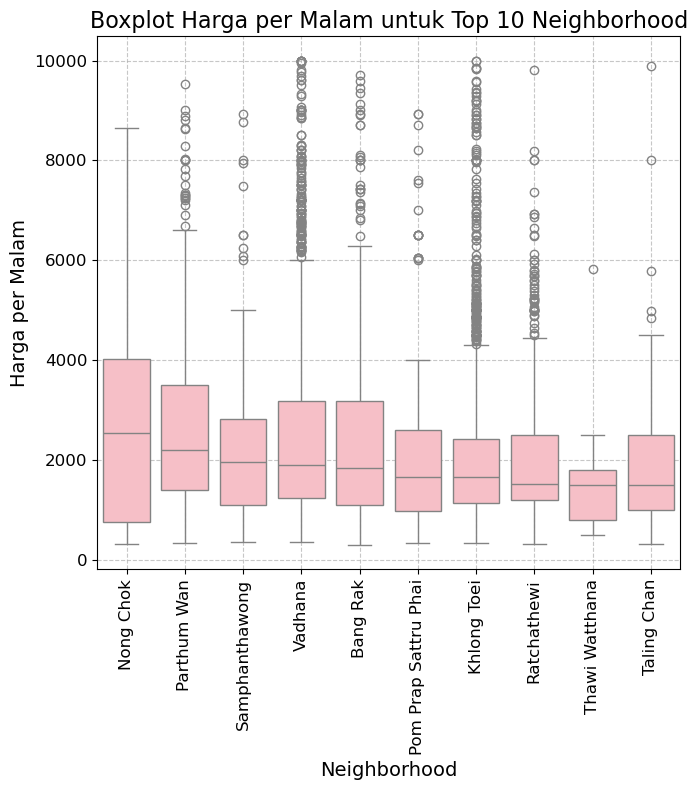

In [26]:
plt.figure(figsize=(7,8))

# Buat boxplot tanpa outlier
sns.boxplot(
    x='neighbourhood', 
    y='price', 
    data=df_filter_top10, 
    order=top10_neighbourhoods,
    showfliers=True,            
    color='#FFB6C1'           
)

# Tambahkan judul dan label
plt.title('Boxplot Harga per Malam untuk Top 10 Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Harga per Malam', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### REVIEW ANALYSIS

In [27]:
# Pastikan kolom 'last_review' berbentuk datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Ambil tahun dari last_review
df['tahun'] = df['last_review'].dt.year

# Hitung jumlah review per tahun
review_per_tahun = df.groupby('tahun').size().reset_index(name='jumlah_review')


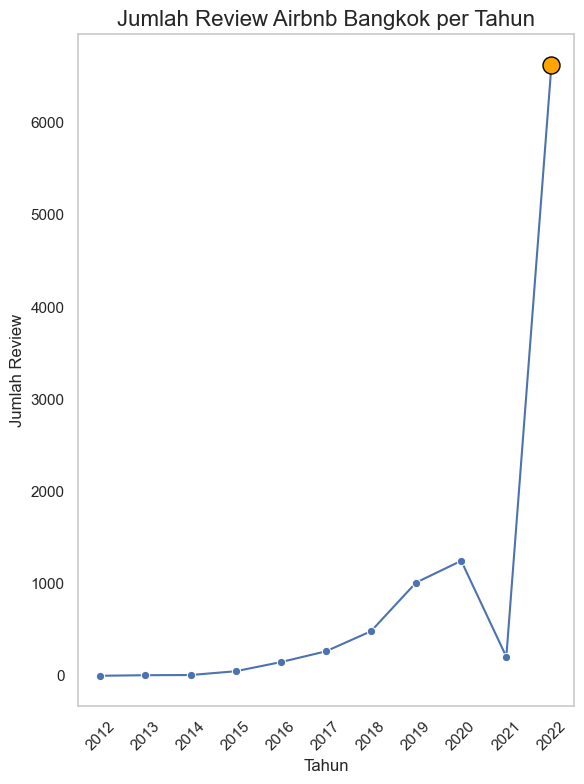

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,8))

# Plot garis
sns.lineplot(x='tahun', y='jumlah_review', data=review_per_tahun, marker='o')

# Titik tahun 2022 (warna orange)
tahun_2022 = review_per_tahun[review_per_tahun['tahun'] == 2022]
plt.scatter(tahun_2022['tahun'], tahun_2022['jumlah_review'], color='orange', s=150, edgecolor='black', zorder=5)

# Styling
plt.title('Jumlah Review Airbnb Bangkok per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)
plt.xticks(review_per_tahun['tahun'], rotation=45)  # tampilkan semua tahun
plt.grid(False)
plt.tight_layout()

plt.show()

In [29]:
#Filter data: hanya listing yang terakhir di-review tahun 2022
df_2022 = df[df['last_review'].dt.year == 2022]

# Hitung total review per neighbourhood di tahun 2022
review_2022_per_neighbourhood = df_2022.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# Urutkan dari yang terbanyak
review_2022_per_neighbourhood = review_2022_per_neighbourhood.sort_values(by='number_of_reviews', ascending=False)

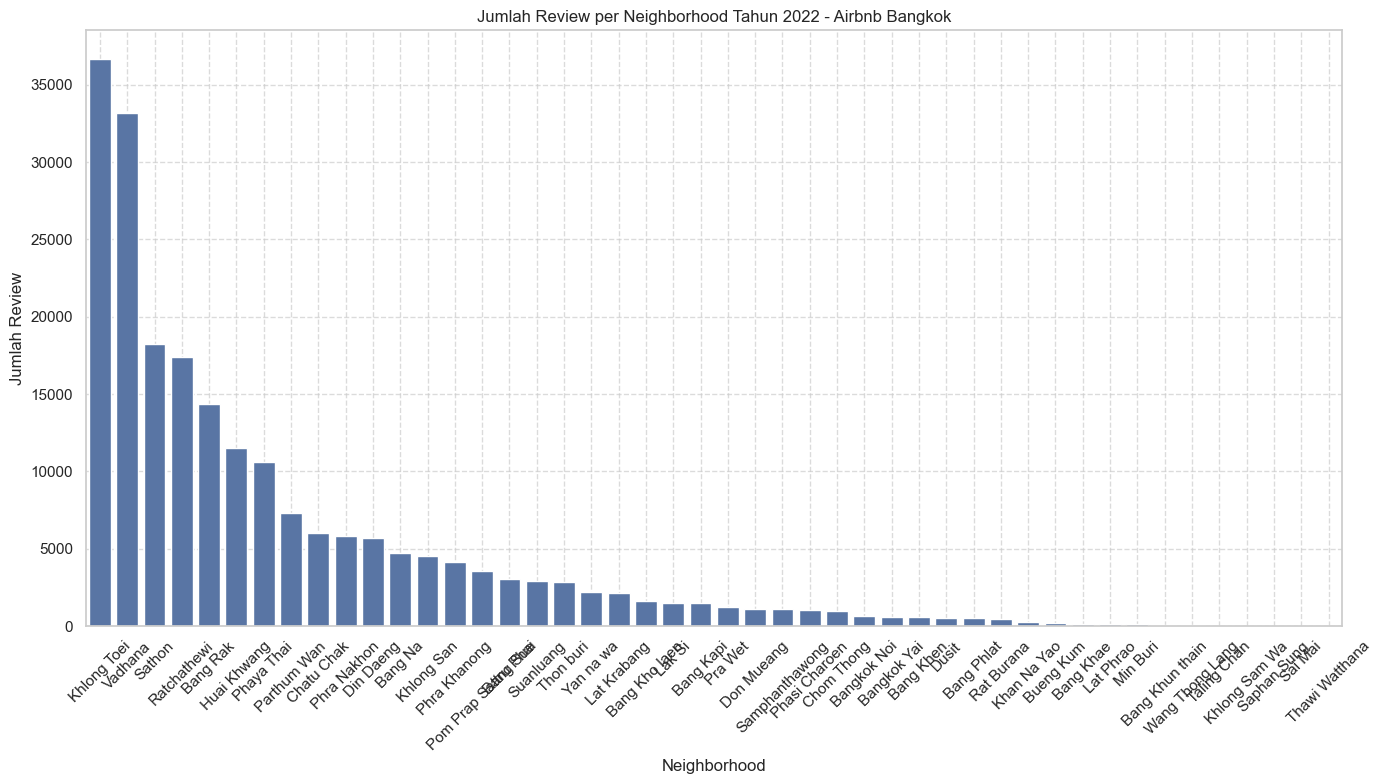

In [30]:
plt.figure(figsize=(14,8))
sns.barplot(x='neighbourhood', y='number_of_reviews', data=review_2022_per_neighbourhood)

plt.title('Jumlah Review per Neighborhood Tahun 2022 - Airbnb Bangkok')
plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [31]:
# Ambil data tahun 2020 dan 2022
df_2020 = df[df['last_review'].dt.year == 2020]
df_2022 = df[df['last_review'].dt.year == 2022]

# Hitung jumlah review per neighborhood untuk 2020
review_2020 = df_2020.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
review_2020.rename(columns={'number_of_reviews': 'reviews_2020'}, inplace=True)

# Hitung jumlah review per neighborhood untuk 2022
review_2022 = df_2022.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()
review_2022.rename(columns={'number_of_reviews': 'reviews_2022'}, inplace=True)

# Gabungkan data 2020 dan 2022
review_compare = pd.merge(review_2020, review_2022, on='neighbourhood', how='outer').fillna(0)

# Urutkan berdasarkan jumlah review total (2020+2022)
review_compare['total_reviews'] = review_compare['reviews_2020'] + review_compare['reviews_2022']
review_compare = review_compare.sort_values(by='total_reviews', ascending=False)

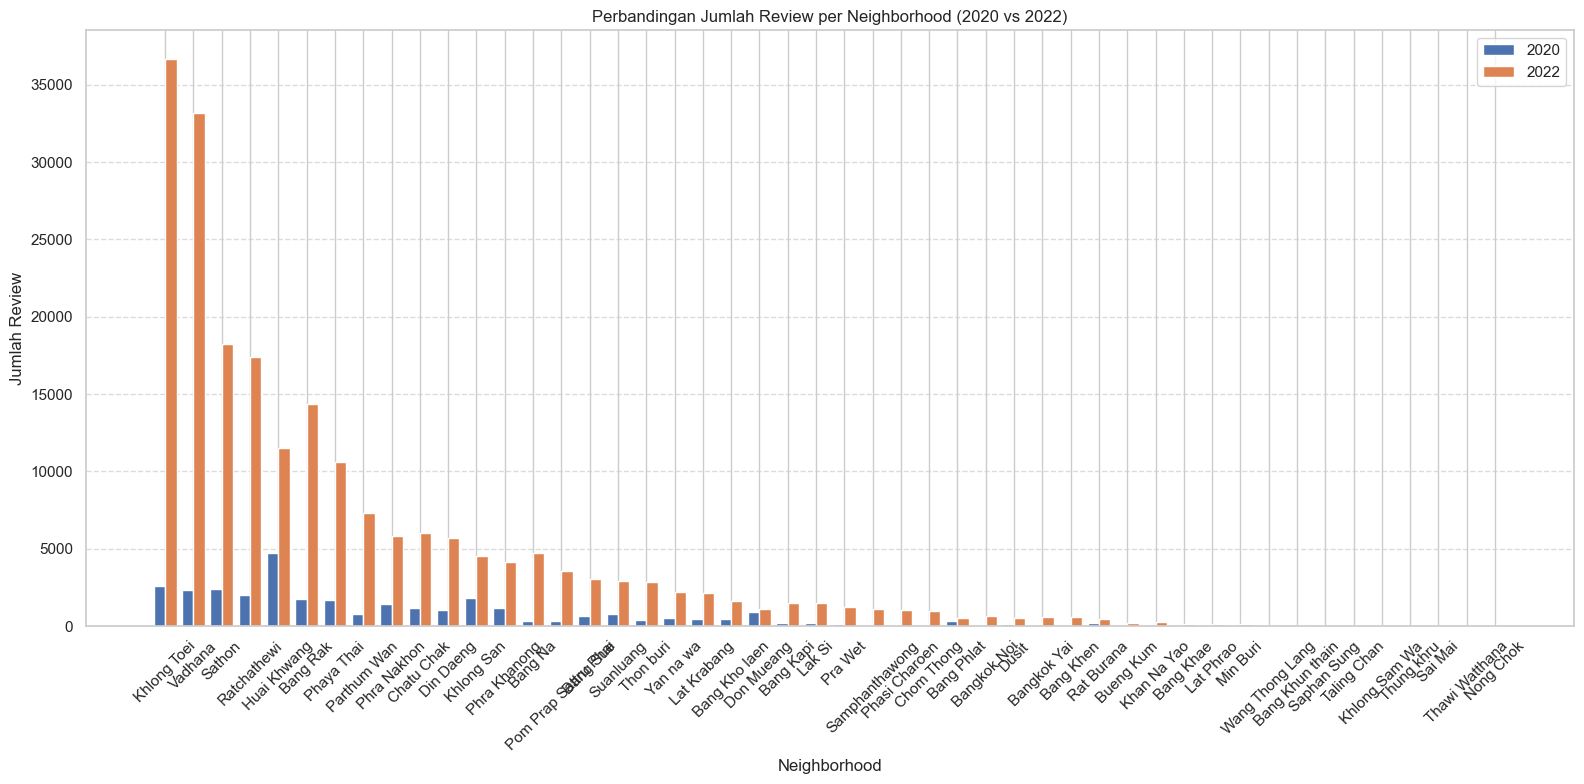

In [32]:
plt.figure(figsize=(16,8))
bar_width = 0.4
x = range(len(review_compare))

plt.bar(x, review_compare['reviews_2020'], width=bar_width, label='2020')
plt.bar([p + bar_width for p in x], review_compare['reviews_2022'], width=bar_width, label='2022')

plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Review')
plt.title('Perbandingan Jumlah Review per Neighborhood (2020 vs 2022)')
plt.xticks([p + bar_width/2 for p in x], review_compare['neighbourhood'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [33]:
# Hitung total number_of_reviews_ltm per neighbourhood
review_ltm_per_neighbourhood = df.groupby('neighbourhood')['number_of_reviews_ltm'].sum().reset_index()

# Urutkan dari jumlah review terbesar
review_ltm_per_neighbourhood = review_ltm_per_neighbourhood.sort_values(by='number_of_reviews_ltm', ascending=False)

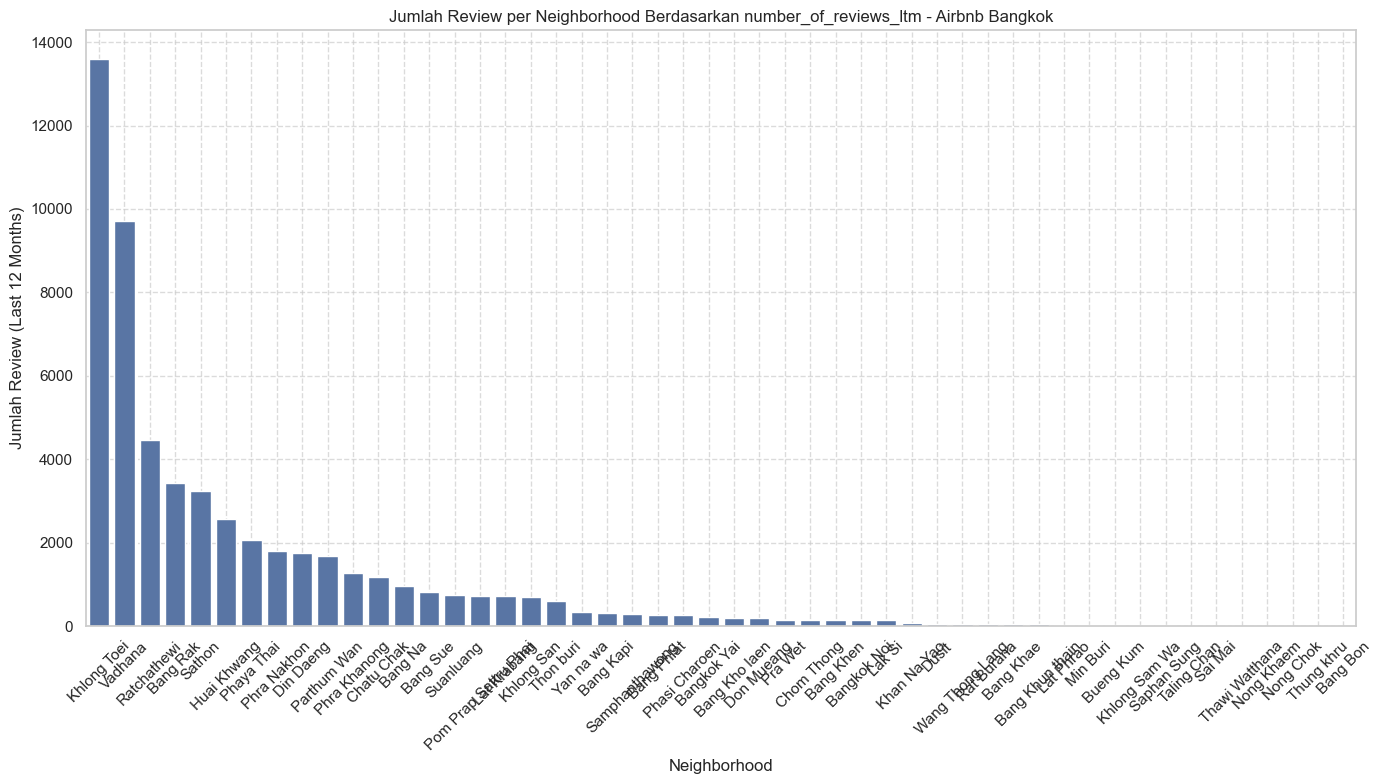

In [34]:
plt.figure(figsize=(14,8))
sns.barplot(x='neighbourhood', y='number_of_reviews_ltm', data=review_ltm_per_neighbourhood)

plt.title('Jumlah Review per Neighborhood Berdasarkan number_of_reviews_ltm - Airbnb Bangkok')
plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Review (Last 12 Months)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [35]:
# Hitung total reviews dan reviews LTM per neighbourhood
review_summary = df.groupby('neighbourhood')[['number_of_reviews', 'number_of_reviews_ltm']].sum().reset_index()

# Urutkan berdasarkan number_of_reviews (total review lifetime)
top10_review_summary = review_summary.sort_values(by='number_of_reviews', ascending=False).head(10)

# Atur posisi sumbu X
bar_width = 0.4
x = range(len(top10_review_summary))

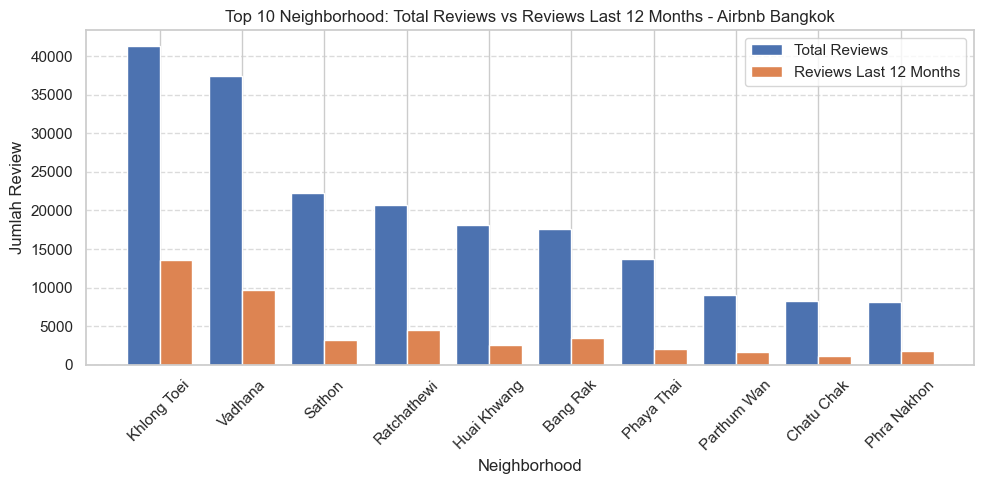

In [36]:
plt.figure(figsize=(10,5))

# Bar untuk total reviews
plt.bar(x, top10_review_summary['number_of_reviews'], width=bar_width, label='Total Reviews')

# Bar untuk reviews LTM (geser ke kanan sedikit)
plt.bar([p + bar_width for p in x], top10_review_summary['number_of_reviews_ltm'], width=bar_width, label='Reviews Last 12 Months')

# Label dan layout
plt.xlabel('Neighborhood')
plt.ylabel('Jumlah Review')
plt.title('Top 10 Neighborhood: Total Reviews vs Reviews Last 12 Months - Airbnb Bangkok')
plt.xticks([p + bar_width/2 for p in x], top10_review_summary['neighbourhood'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### ROOM TYPE ANALYSIS

In [37]:
# Filter hanya Khlong Toei dan Nong Chok
df_filtered = df[df['neighbourhood'].isin(['Khlong Toei', 'Nong Chok'])]

# Pastikan number_of_reviews_ltm numerik
df_filtered['number_of_reviews_ltm'] = pd.to_numeric(df_filtered['number_of_reviews_ltm'], errors='coerce')

# Drop NA pada number_of_reviews_ltm
df_filtered = df_filtered.dropna(subset=['number_of_reviews_ltm'])

# Hitung total review_ltm per room_type per distrik
reviews_ltm_count = df_filtered.groupby(['neighbourhood', 'room_type'])['number_of_reviews_ltm'].sum().reset_index()

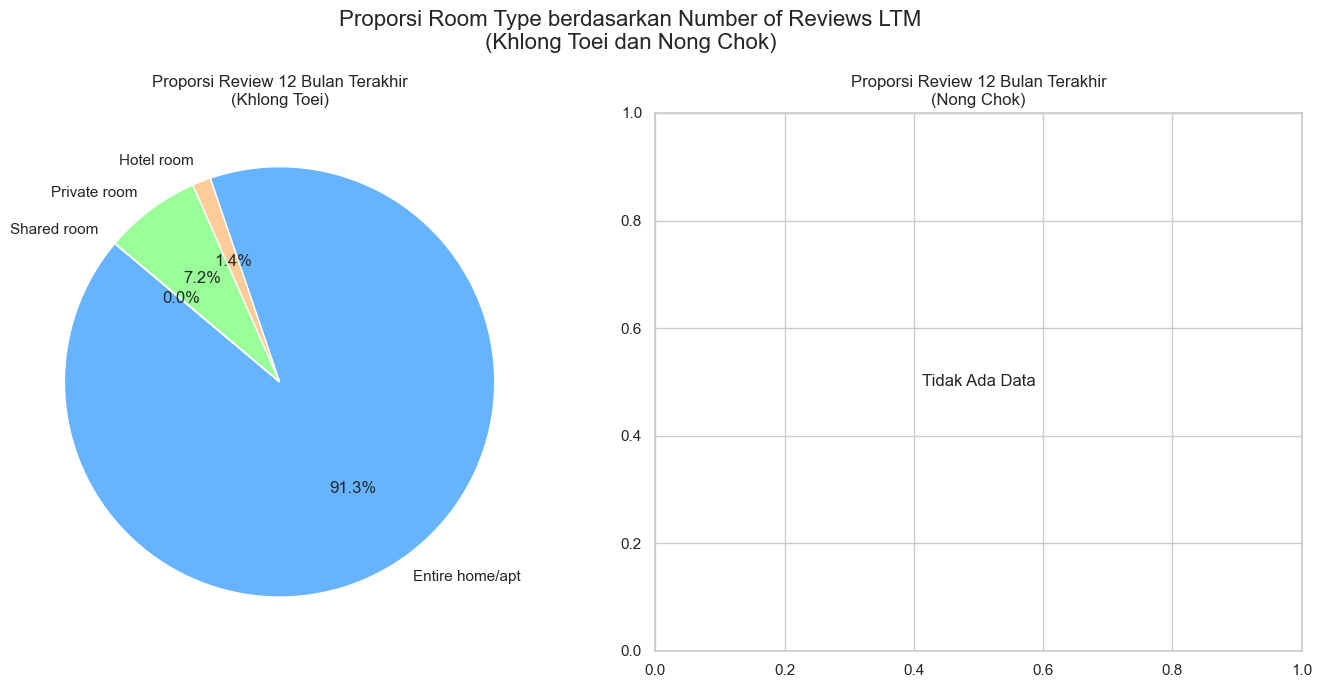

In [38]:
# Warna konsisten
color_mapping = {
    'Entire home/apt': '#66b3ff',
    'Private room': '#99ff99',
    'Shared room': '#ff9999',
    'Hotel room': '#ffcc99'
}

# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # 1 baris 2 kolom

# Buat pie chart untuk masing-masing distrik
for ax, neighbourhood in zip(axes, ['Khlong Toei', 'Nong Chok']):
    data = reviews_ltm_count[reviews_ltm_count['neighbourhood'] == neighbourhood]
    
    # Filter data: buang yang 0 atau NaN (kalau ada)
    data = data[data['number_of_reviews_ltm'] > 0]

    if not data.empty:  # pastikan data tidak kosong
        colors = [color_mapping.get(rt, '#d3d3d3') for rt in data['room_type']]
        ax.pie(
            data['number_of_reviews_ltm'],
            labels=data['room_type'],
            autopct='%1.1f%%',
            startangle=140,
            colors=colors
        )
        ax.set_title(f'Proporsi Review 12 Bulan Terakhir\n({neighbourhood})')
    else:
        ax.text(0.5, 0.5, 'Tidak Ada Data', ha='center', va='center', fontsize=12)
        ax.set_title(f'Proporsi Review 12 Bulan Terakhir\n({neighbourhood})')

# Styling tambahan
plt.suptitle('Proporsi Room Type berdasarkan Number of Reviews LTM\n(Khlong Toei dan Nong Chok)', fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
# Hitung median harga per room_type untuk masing-masing distrik
median_price = df_filtered.groupby(['neighbourhood', 'room_type'])['price'].median().reset_index()

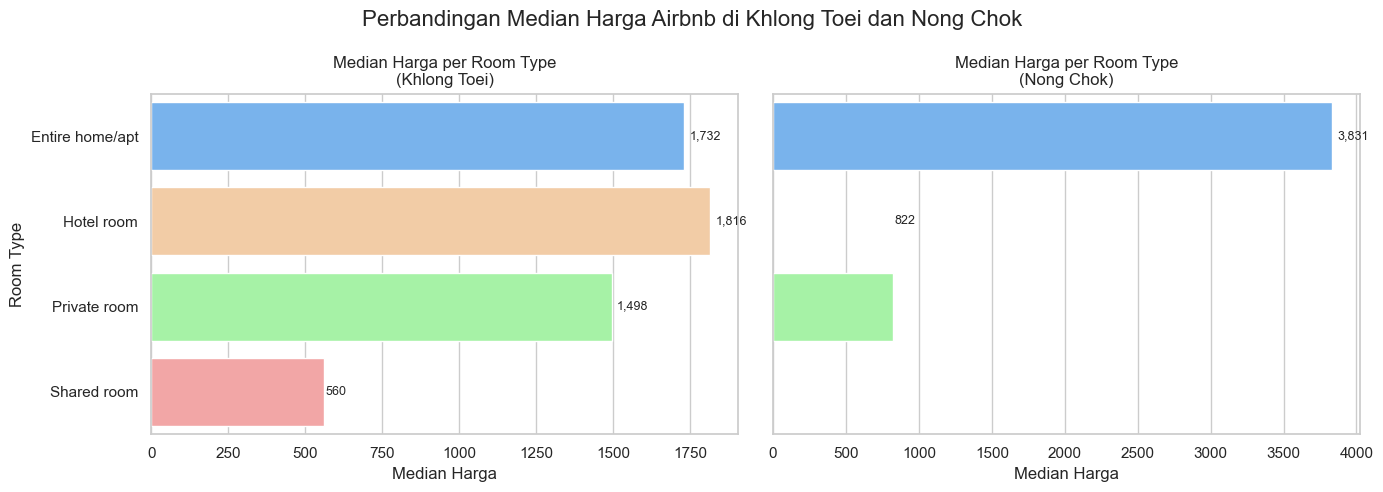

In [40]:
# Warna konsisten untuk setiap room_type
color_mapping = {
    'Entire home/apt': '#66b3ff',  # biru
    'Private room': '#99ff99',     # hijau
    'Shared room': '#ff9999',      # merah muda
    'Hotel room': '#ffcc99'        # oranye
}

# Setup figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Fungsi untuk ambil warna berdasarkan room type
def get_colors(room_types):
    return [color_mapping.get(rt, '#d3d3d3') for rt in room_types]

# Plot untuk Khlong Toei
data_kt = median_price[median_price['neighbourhood'] == 'Khlong Toei']
sns.barplot(
    data=data_kt,
    x='price', y='room_type',
    ax=axes[0],
    palette=get_colors(data_kt['room_type'])
)
axes[0].set_title('Median Harga per Room Type\n(Khlong Toei)')
axes[0].set_xlabel('Median Harga')
axes[0].set_ylabel('Room Type')

# Tambahkan label untuk Khlong Toei
for i, (value, room) in enumerate(zip(data_kt['price'], data_kt['room_type'])):
    axes[0].text(value + (value * 0.01), i, f'{int(value):,}', va='center', fontsize=9)

# Plot untuk Nong Chok
data_nc = median_price[median_price['neighbourhood'] == 'Nong Chok']
sns.barplot(
    data=data_nc,
    x='price', y='room_type',
    ax=axes[1],
    palette=get_colors(data_nc['room_type'])
)
axes[1].set_title('Median Harga per Room Type\n(Nong Chok)')
axes[1].set_xlabel('Median Harga')
axes[1].set_ylabel('')

# Tambahkan label untuk Nong Chok
for i, (value, room) in enumerate(zip(data_nc['price'], data_nc['room_type'])):
    axes[1].text(value + (value * 0.01), i, f'{int(value):,}', va='center', fontsize=9)

# Styling tambahan
plt.suptitle('Perbandingan Median Harga Airbnb di Khlong Toei dan Nong Chok', fontsize=16)
plt.tight_layout()
plt.show()

### KESIMPULAN DAN SARAN

Kesimpulan yang didapatkan dari hasil analisa diatas adalah :

1. Customer pengguna Airbnb di Bangkok masih di dominasi oleh turis yang melakukan transaksi di tengah kota Bangkok.

2. Distrik yang paling berkembang dalam jumlah transaksi di Bangkok adalah Distrik Khlong Toei.

3. Distrik yang memiliki potensi untuk berkembang adalah Distrik Nong Chok.


Saran yang direkomendasikan untuk 2 kawasan/distrik yang disebutkan diatas : 
1. Khlong Toei : Optimasi Peningkatan Transaksi Hotel dengan tambahan Paket Liburan untuk transaksi room type Hotel 
2. Nong Chok : Pengaktifan kembali penginapan Entire Room dengan :
- Promo 30% dan wisata Nong Chok
- Kerjasama antara host dengan area wisata Nong Chok dengan skema bagi hasil 

